# Exploring Convolutions

We will explore how convolutions work by creating a basic convolution on a 2D grayscale image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.datasets import ascent

First, you will load the [ascent](https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.ascent.html) image from [SciPy](https://scipy.org/). It's a nice, built-in picture with lots of angles and lines. 

In [2]:
# load the ascent image
ascent_image = ascent()

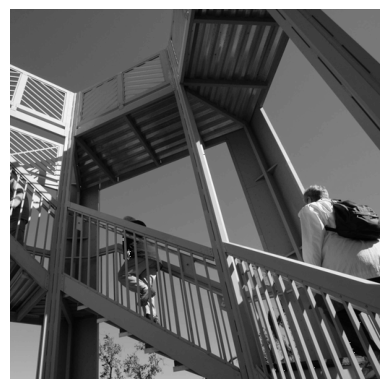

In [3]:
# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

The image is stored as a numpy array so we can create the transformed image by first copying that array.

In [21]:
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

print(f"image_transformed has shape: {size_x, size_y}")

image_transformed has shape: (512, 512)


In [22]:
image_transformed

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]], dtype=uint8)

Now we can create a filter as a 3x3 array. 

In [23]:
# Experiment with different values and see the effect
filter1 = [[0, 1, 0], 
          [1, -4, 1], 
          [0, 1, 0]]

filter2 = [[-1, -2, -1], 
           [0, 0, 0], 
           [1, 2, 1]]
filter3 = [[-1, 0, 1], 
           [-2, 0, 2], 
           [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, we 
# should do a weight to get it to do so
# so, for example, if our weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so we would set a weight of .1 if you want to normalize them
weight  = 1

Now we can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.) 

we'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

In [24]:
def apply_filter(image, kernel, weight=1.0):
    size_x, size_y = image.shape
    output = np.copy(image) 
    
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0

            # Apply 3x3 kernel
            for i in range(3):
                for j in range(3):
                    convolution += image[x - 1 + i, y - 1 + j] * kernel[i][j]

            convolution *= weight

            # Clamp the result to [0, 255]
            convolution = max(0, min(255, convolution))

            output[x, y] = convolution

    return output

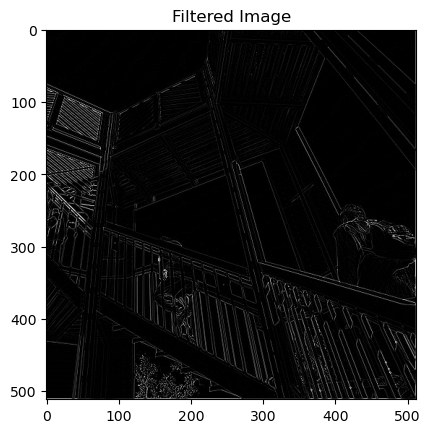

In [25]:
filtered_image = apply_filter(image_transformed, filter1, weight=1.0)  # vertical edges
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()

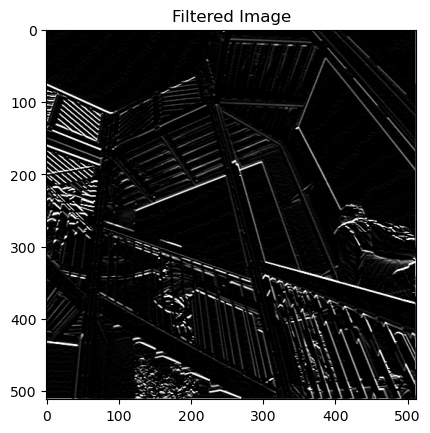

In [27]:
filtered_image = apply_filter(image_transformed, filter2, weight=1.0)   # horizontal edges
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()

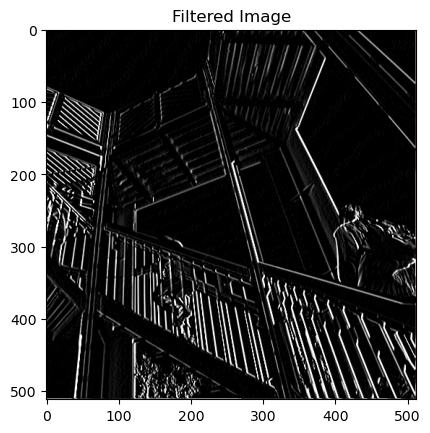

In [28]:
filtered_image = apply_filter(image_transformed, filter3, weight=1.0)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()

In [29]:
filtered_image

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,   5,   4, ...,   0,   0, 117],
       [ 80,   8,   6, ...,   0,   0, 117],
       ...,
       [178,   0,   0, ...,  13,   8,  57],
       [178,   0,   0, ...,  38,   3,  57],
       [178, 178, 178, ...,  57,  57,  58]], dtype=uint8)

## Effect of Max Pooling

The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. we'll see that the features get maintained despite this compression!

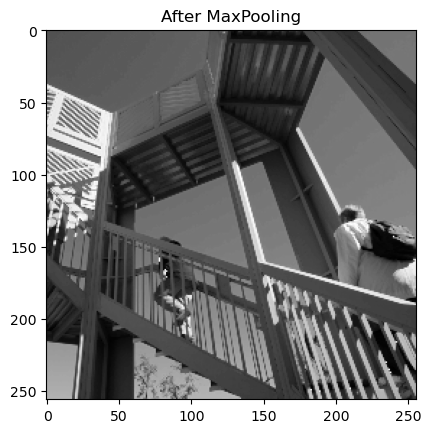

In [31]:
# Assign dimensions half the size of the original image
new_x = int(size_x / 2)
new_y = int(size_y / 2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
    
        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Get only the largest value and assign to the reduced image
        newImage[int(x / 2), int(y / 2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.title("After MaxPooling")
plt.show()